In [250]:
import numpy as np 
import pandas as pd 
import re
import seaborn as sns
import os

In [251]:
# Open directory.
os.chdir('C:/Users/Vince/Documents/Education/BPP')

In [252]:
# Load dataset Top 20 runners from all UTMB races 2003 to 2024.
Ultra = pd.read_csv('UTMB top 20.csv')

In [253]:
# Check number of runners - (21 * 20 = 420) No race in 2020 due to Covid.
Ultra.shape

(420, 11)

In [254]:
# Data Types.
Ultra.dtypes

Year                      int64
Position                  int64
Finish Time              object
Name                     object
Event Distance (km)     float64
Elevation (m)             int64
Club                     object
Country                  object
Gender                   object
Catergory                object
Average Speed (km/h)    float64
dtype: object

In [255]:
# Check for blanks.
print("Columns with missing data:")
print(Ultra.isna().sum())

Columns with missing data:
Year                     0
Position                 0
Finish Time              0
Name                     0
Event Distance (km)      0
Elevation (m)            0
Club                    30
Country                  0
Gender                   0
Catergory                0
Average Speed (km/h)     0
dtype: int64


In [256]:
Ultra.head()

,Year,Position,Finish Time,Name,Event Distance (km),Elevation (m),Club,Country,Gender,Catergory,Average Speed (km/h)
0,2024,1,19:54:23,BOUILLARD Vincent,176.4,9915,NaN,FRA,M,M23,8.86
1,2024,2,20:22:45,CHASSAGNE Baptiste,176.4,9915,TEAM ON,FRA,M,M23,8.66
2,2024,3,20:26:22,LOPEZ Joaquin,176.4,9915,WAA Team,ECU,M,M23,8.63
3,2024,4,20:31:54,NAMBERGER Hannes,176.4,9915,Dynafit,GER,M,M35,8.59
4,2024,5,20:57:48,POMMERET Ludovic,176.4,9915,Hoka ONE One,FRA,M,M45,8.41


In [257]:
# Sort by finish time.
Ultra.sort_values(by=['Finish Time'])

,Year,Position,Finish Time,Name,Event Distance (km),Elevation (m),Club,Country,Gender,Catergory,Average Speed (km/h)
260,2010,1,10:30:37,CLEMENT Benoît,89.0,5000,The North Face,GBR,M,M23,8.5
220,2012,1,10:32:36,D'HAENE Francois,103.4,6000,Team Salomon Internati...,FRA,M,M23,9.8
261,2010,2,10:37:38,AGUETTAZ Christophe,89.0,5000,The North Face,USA,M,M23,8.4
262,2010,3,10:49:18,PECH Philippe,89.0,5000,Euskal Selekzioa,ESP,M,M35,8.2
263,2010,4,10:53:45,GIRAUD-SAUVEUR Herve,89.0,5000,Team Salomon,FRA,M,M23,8.2
...,...,...,...,...,...,...,...,...,...,...,...
415,2003,16,28:18:54,VUILLEMENOT Roland,150.0,8000,Ultra Maarathon Franc,FRA,M,M55,5.3
416,2003,17,28:31:02,POLETTI Michel,150.0,8000,Cmbm / Ufo,FRA,M,M45,5.3
417,2003,18,28:31:02,BERTONE Silvio,150.0,8000,Atletica Rivoli S.Giusep,ITA,M,M35,5.3
418,2003,19,29:02:07,DELEMONTEZ Didier,150.0,8000,Faucigny Athletic Club,FRA,M,M45,5.2


In [258]:
# The 2010 and 2012 races were shortened due to adverse weather conditions.
# Remove shortened races.

Ultra2 = Ultra.loc[~((Ultra['Year'] == 2010) | (Ultra['Year'] == 2012))]
Ultra2.sort_values(by=['Finish Time'])


,Year,Position,Finish Time,Name,Event Distance (km),Elevation (m),Club,Country,Gender,Catergory,Average Speed (km/h)
120,2017,1,19:01:54,D'HAENE Francois,167.7,10170,Salomon,FRA,M,M23,8.80
121,2017,2,19:16:59,JORNET BURGADA Kilian,167.7,10170,Salomon,ESP,M,M23,8.70
20,2023,1,19:37:43,WALMSLEY Jim,170.0,10000,Hoka,USA,M,M23,8.66
40,2022,1,19:49:30,JORNET BURGADA Kilian,170.0,10000,Nnormal,ESP,M,M23,8.60
122,2017,3,19:53:00,TOLLEFSON Tim,167.7,10170,Hoka,USA,M,M23,8.40
...,...,...,...,...,...,...,...,...,...,...,...
415,2003,16,28:18:54,VUILLEMENOT Roland,150.0,8000,Ultra Maarathon Franc,FRA,M,M55,5.30
416,2003,17,28:31:02,POLETTI Michel,150.0,8000,Cmbm / Ufo,FRA,M,M45,5.30
417,2003,18,28:31:02,BERTONE Silvio,150.0,8000,Atletica Rivoli S.Giusep,ITA,M,M35,5.30
418,2003,19,29:02:07,DELEMONTEZ Didier,150.0,8000,Faucigny Athletic Club,FRA,M,M45,5.20


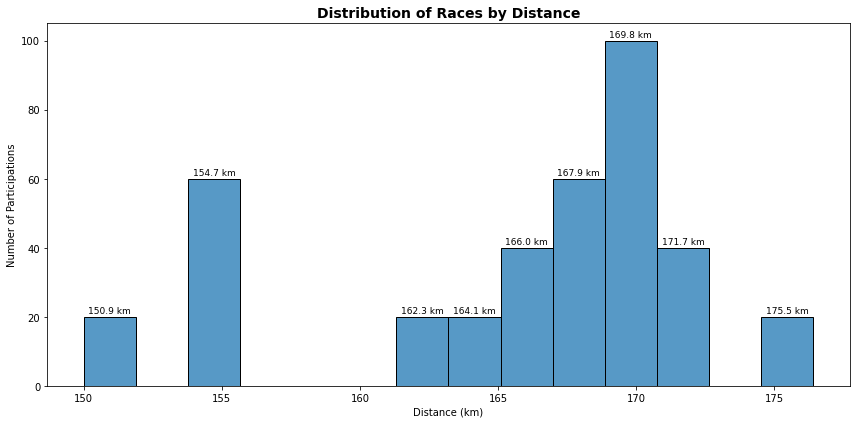

In [259]:
plt.figure(figsize=(12, 6))

# Create the histogram and capture the bin data.
hist = sns.histplot(Ultra2['Event Distance (km)'])

for patch in hist.patches:
    height = patch.get_height()
    if height > 0:
        bin_center = patch.get_x() + patch.get_width() / 2
        distance_label = f'{bin_center:.1f} km'
        plt.text(bin_center, height + 0.5, distance_label, ha='center', va='bottom', fontsize=9, rotation=0)

# Title and axis labels.
plt.title('Distribution of Races by Distance', fontsize=14, weight='bold')
plt.xlabel('Distance (km)')
plt.ylabel('Number of Participations')

plt.tight_layout()
plt.show()



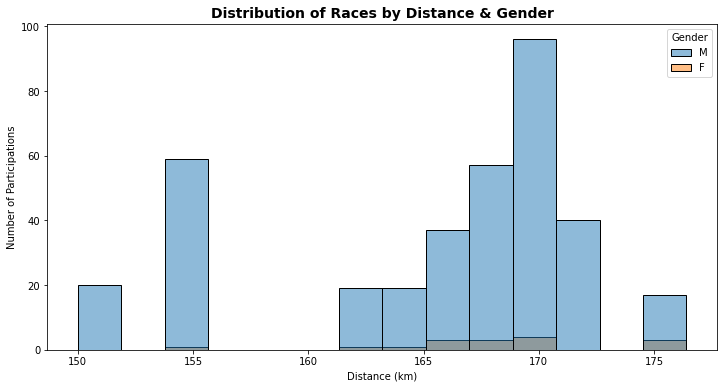

In [260]:
# Most consistant distance for the race & gender. 
plt.figure(figsize=(12, 6))

sns.histplot(Ultra2,x='Event Distance (km)',hue='Gender')

#Title and axis labels.
plt.title('Distribution of Races by Distance & Gender', fontsize=14, weight='bold')
plt.xlabel('Distance (km)')
plt.ylabel('Number of Participations')

# Plot the histogram.
plt.show()

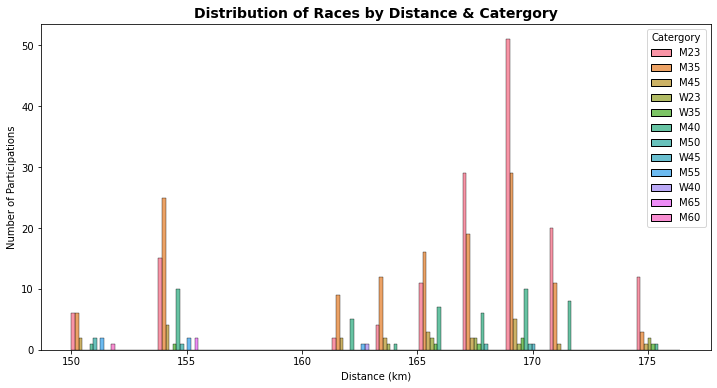

In [261]:
# Participants by Catergory & Distance.

plt.figure(figsize=(12, 6)) 

sns.histplot(Ultra2,x='Event Distance (km)',hue='Catergory', multiple='dodge')

#Title and axis labels
plt.title('Distribution of Races by Distance & Catergory', fontsize=14, weight='bold')
plt.xlabel('Distance (km)')
plt.ylabel('Number of Participations')

# Plot the histogram
plt.show()

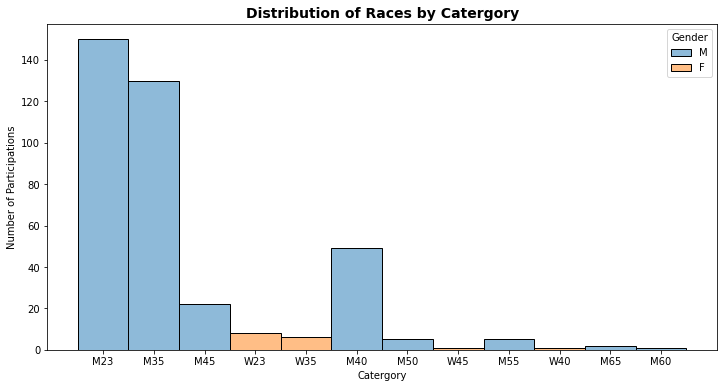

In [262]:
# Distribution of Catergory.

plt.figure(figsize=(12, 6)) 

sns.histplot(Ultra2, x='Catergory',hue='Gender')

#Title and axis labels
plt.title('Distribution of Races by Catergory', fontsize=14, weight='bold')
plt.xlabel('Catergory')
plt.ylabel('Number of Participations')


plt.show()


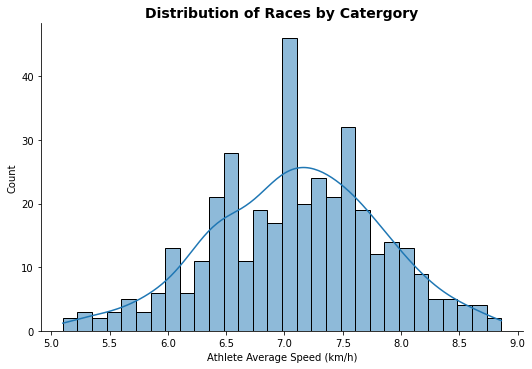

In [263]:
# Create the distribution plot for Average Speed.
sns.displot(filtered_speed, kind='hist', bins=30, kde=True, aspect=1.5)

#Title and axis labels
plt.title('Distribution of Races by Catergory', fontsize=14, weight='bold')
plt.xlabel('Athlete Average Speed (km/h)')
plt.show()



In [264]:
# Difference in speed for the race length male to female.

Ultra2.groupby(['Event Distance (km)','Gender'])['Average Speed (km/h)'].mean()

Event Distance (km)  Gender
150.0                M         5.835000
155.0                F         5.900000
                     M         6.357627
163.0                F         6.400000
                     M         6.821053
165.0                F         6.500000
                     M         6.800000
166.0                F         6.566667
                     M         6.835135
167.7                M         7.845000
168.0                F         7.133333
                     M         7.345946
170.0                F         6.700000
                     M         7.517308
170.3                F         7.300000
                     M         7.411111
171.0                M         7.370000
176.4                F         7.766667
                     M         8.147059
Name: Average Speed (km/h), dtype: float64

In [265]:
# Average speed by Catergory and Group count.
Ultra2.groupby('Catergory')['Average Speed (km/h)'].agg(['mean','count']).sort_values('mean',ascending=True)

,mean,count
Catergory,,
M65,6.150000,2
M60,6.200000,1
M50,6.280000,5
W40,6.400000,1
M55,6.660000,5
W45,6.700000,1
M45,6.718182,22
W35,6.888333,6
M40,6.951020,49


<AxesSubplot:xlabel='Catergory', ylabel='Average Speed (km/h)'>

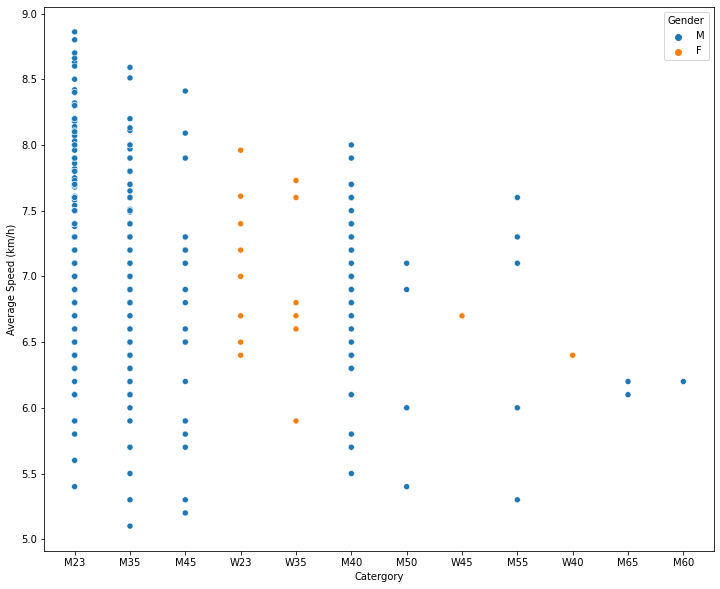

In [266]:
# Visualise speed by Catergory

# Plot with sorted country order.
plt.figure(figsize=(12, 10))
sns.scatterplot(
 data=Ultra2,
 x="Catergory",
 y="Average Speed (km/h)",
 hue="Gender"
)



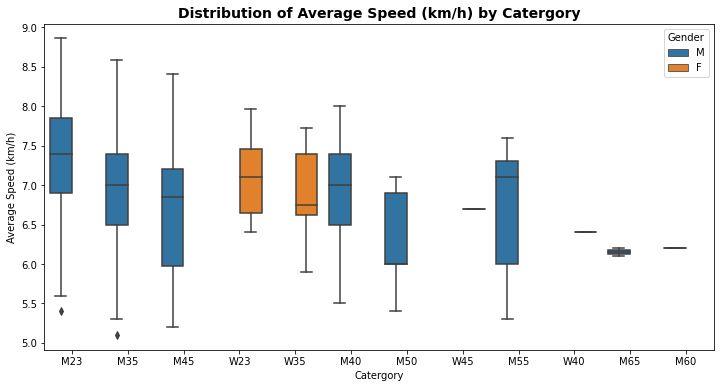

In [267]:
# Boxplot Average speed per Catergory

plt.figure(figsize=(12, 6))
sns.boxplot(data=Ultra2, x='Catergory', y='Average Speed (km/h)', hue='Gender')

#Title and axis labels
plt.title('Distribution of Average Speed (km/h) by Catergory', fontsize=14, weight='bold')
plt.xlabel('Catergory')
plt.ylabel('Average Speed (km/h)')

plt.show()


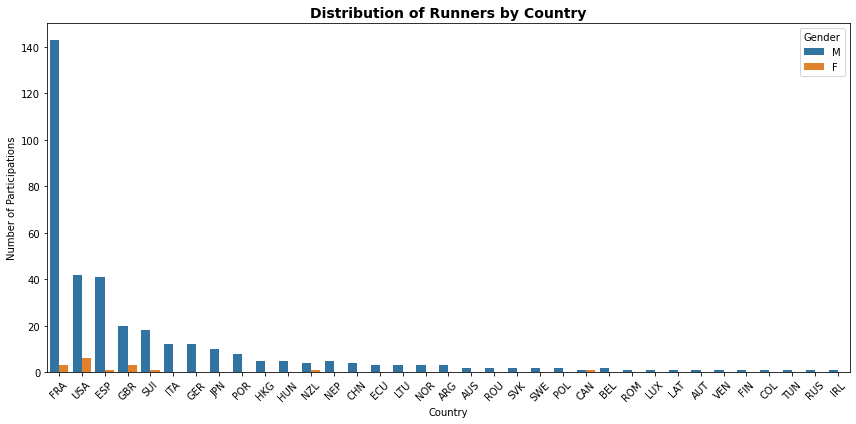

In [268]:
# Check numbers for 'Home Advantage'. Home nation for race is France. 

# Count and sort countries by frequency.
country_order = Ultra2['Country'].value_counts().index.tolist()

# Plot with sorted country order.
plt.figure(figsize=(12, 6))
sns.countplot(data=Ultra2, x='Country', hue='Gender', order=country_order)

# Title and axis labels.
plt.title('Distribution of Runners by Country', fontsize=14, weight='bold')
plt.xlabel('Country')
plt.ylabel('Number of Participations')
plt.legend(title='Gender', loc='upper right')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()



In [269]:
# Fastest Countries.
# Group by country and calculate mean speed and count.
Country_stats = Ultra2.groupby('Country')['Average Speed (km/h)'].agg(['mean', 'count'])

Country_order = country_stats.sort_values('mean', ascending=False)

print(Country_order)


             mean  count
Country                 
ECU      7.976667      3
ROU      7.800000      2
NZL      7.706000      5
LTU      7.700000      3
FIN      7.610000      1
LAT      7.600000      1
NOR      7.566667      3
BEL      7.550000      2
ROM      7.510000      1
CHN      7.470000      4
AUT      7.400000      1
COL      7.400000      1
POL      7.370000      2
CAN      7.355000      2
ESP      7.336667     42
USA      7.281667     48
ARG      7.236667      3
GER      7.179167     12
NEP      7.160000      5
GBR      7.150000     23
SWE      7.150000      2
RUS      7.100000      1
VEN      7.100000      1
HKG      7.100000      5
POR      7.012500      8
TUN      7.000000      1
JPN      7.000000     10
HUN      6.960000      5
AUS      6.950000      2
FRA      6.947055    146
ITA      6.925000     12
IRL      6.800000      1
SUI      6.663158     19
LUX      6.300000      1
SVK      6.000000      2


In [270]:
#Top 10 fastest runners.
fastest_athletes = Ultra2.nlargest(10, 'Average Speed (km/h)')
fastest_athletes


,Year,Position,Finish Time,Name,Event Distance (km),Elevation (m),Club,Country,Gender,Catergory,Average Speed (km/h)
0,2024,1,19:54:23,BOUILLARD Vincent,176.4,9915,NaN,FRA,M,M23,8.86
120,2017,1,19:01:54,D'HAENE Francois,167.7,10170,Salomon,FRA,M,M23,8.80
121,2017,2,19:16:59,JORNET BURGADA Kilian,167.7,10170,Salomon,ESP,M,M23,8.70
1,2024,2,20:22:45,CHASSAGNE Baptiste,176.4,9915,TEAM ON,FRA,M,M23,8.66
20,2023,1,19:37:43,WALMSLEY Jim,170.0,10000,Hoka,USA,M,M23,8.66
2,2024,3,20:26:22,LOPEZ Joaquin,176.4,9915,WAA Team,ECU,M,M23,8.63
40,2022,1,19:49:30,JORNET BURGADA Kilian,170.0,10000,Nnormal,ESP,M,M23,8.60
3,2024,4,20:31:54,NAMBERGER Hannes,176.4,9915,Dynafit,GER,M,M35,8.59
21,2023,2,19:58:58,MILLER Zach,170.0,10000,the North Face,USA,M,M35,8.51
41,2022,2,19:54:50,BLANCHARD Mathieu,170.0,10000,Salomon,FRA,M,M23,8.50


In [271]:
# Highest average speeds over all participated races in top 20.

# Calculate average speed per runner.
avg_speed = Ultra2.groupby('Name')['Average Speed (km/h)'].mean()

# Count number of races per runner.
race_count = Ultra2['Name'].value_counts()

# Combine both into a single DataFrame.
summary = pd.DataFrame({
    'Average Speed (km/h)': avg_speed,
    'Number of Races': race_count
})
# Sort by average speed descending.
summary = summary.sort_values(by='Average Speed (km/h)', ascending=False)

# Display top 10.
print(summary.head(10))



                       Average Speed (km/h)  Number of Races
BOUILLARD Vincent                  8.860000                1
D'HAENE Francois                   8.433333                3
CAPELL Pau                         8.350000                2
WALMSLEY Jim                       8.320000                3
EVANS Tom                          8.300000                1
CHASSAGNE Baptiste                 8.260000                2
BOWMAN Dylan                       8.200000                1
JORNET BURGADA Kilian              8.200000                5
LIND Cody                          8.180000                1
THEVENARD Xavier                   8.180000                5


In [272]:
# Most First places.
Most_no1 = Ultra2[Ultra2['Position'] == 1]['Name'].value_counts().head(5)
Most_no1



JORNET BURGADA Kilian    4
D'HAENE Francois         3
THEVENARD Xavier         3
OLMO Marco               2
JAQUEROD Christophe      1
Name: Name, dtype: int64

In [273]:
# Filter for podium finishes.
most_podiums = Ultra2[Ultra2['Position'].isin([1, 2, 3])]

# Count podium finishes per runner.
podium_counts = most_podiums['Name'].value_counts()

# Display top results.
print(podium_counts.head(10)) 



JORNET BURGADA Kilian    5
THEVENARD Xavier         4
DELEBARRE Vincent        3
D'HAENE Francois         3
OLMO Marco               3
SHERPA Dachhiri-Dawa     3
CHAIGNEAU Sebastien      2
BLANCHARD Mathieu        2
TOLLEFSON Tim            2
KARRERA ARANBURU Iker    2
Name: Name, dtype: int64


In [274]:
# Podium breakdown by runner.
podium_breakdown = podium.groupby(['Name', 'Position']).size().unstack(fill_value=0)
podium_breakdown['Total Podiums'] = podium_breakdown.sum(axis=1)
top_podiums = podium_breakdown.sort_values('Total Podiums', ascending=False)
print(top_podiums.head(10))


Position               1  2  3  Total Podiums
Name                                         
JORNET BURGADA Kilian  4  1  0              5
THEVENARD Xavier       3  1  0              4
SHERPA Dachhiri-Dawa   1  2  0              3
D'HAENE Francois       3  0  0              3
DELEBARRE Vincent      1  1  1              3
OLMO Marco             2  0  1              3
BLANCHARD Mathieu      0  1  1              2
TOLLEFSON Tim          0  0  2              2
CHAIGNEAU Sebastien    0  1  1              2
KARRERA ARANBURU Iker  0  1  1              2
